Out of the given probability distributions, Exponential, Gamma, Beta and Chi-squared distributions are non-negative
If X and Y are 2 independent, perpendicular and zero mean normal random variables with variance=4, then the distribution of transformed random variable Z=X^2+Y2 follows chi-square distribution with degrees of freedom (k)=2
The PDF of power content, Z=X^2+Y2 is given by (1/((2^(k/2))*((k-1)/2!)*(2*sig^2)))*(x^(k/2-1)*(e^(-x/2)))


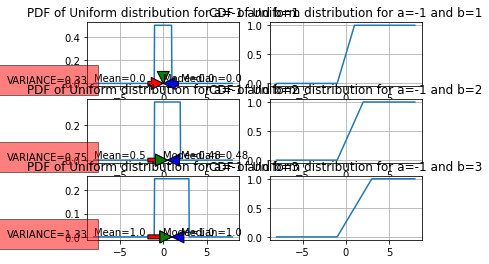

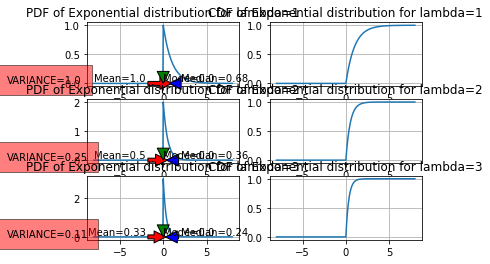

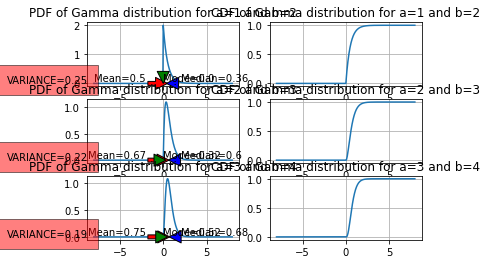

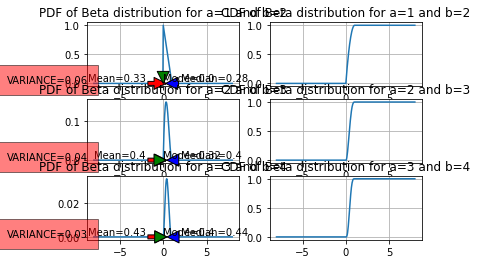

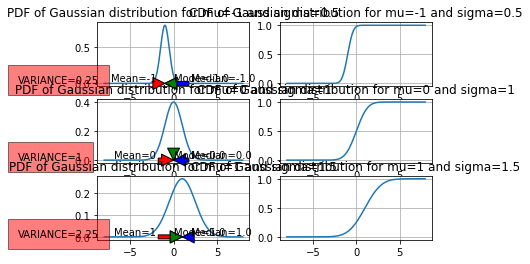

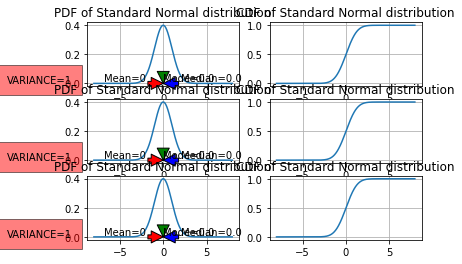

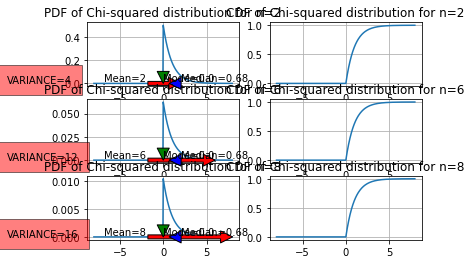

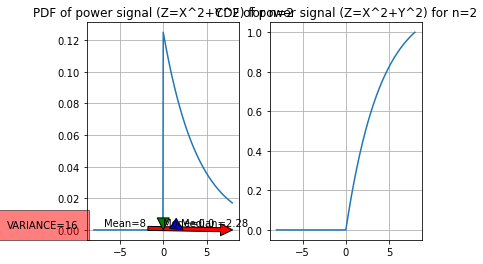

In [1]:
# 1a Continuous distributions

import numpy as np
import matplotlib.pyplot as plt
import math

plt.close('all')


# Class definition of uniform distribution
class uniform:
    def __init__(self,a,b,t):
        self.a = a
        self.b = b
        self.t = t
    def pdf(self):
        temp = np.zeros(len(self.t))
        val = 1/(self.b-self.a)
        temp[(self.t>=self.a) & (self.t<=self.b)] = val
        temp[(self.t<self.a) & (self.t>self.b)] = 0.0
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round((self.a+self.b)/2,2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = ((self.b-self.a)**2)/12
        return round(temp,2)
    

# Class definition of exponential distribution
class expo:
    def __init__(self,lam,t):
        self.lam = lam
        self.t = t
    def pdf(self):
        temp = np.zeros(len(self.t))
        temp[self.t>=0] = self.lam*np.exp(0-self.lam*self.t[self.t>=0])
        temp[self.t<0] = 0.0
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(1/self.lam,2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = 1/(self.lam**2)
        return round(temp,2)
    
    
# Class definition of Gamma distribution
class gamma:
    def __init__(self,a,b,t):
        self.a = a
        self.b = b
        self.t = t
    def pdf(self):
        k = (self.b**self.a)/math.factorial(int(self.a)-1)
        temp = np.zeros(len(self.t))
        temp[self.t>=0] = k*np.multiply(np.power(self.t[self.t>=0],(self.a-1)), np.exp(0-self.b*self.t[self.t>=0]))
        temp[self.t<0] = 0.0
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(self.a/self.b,2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = self.a/(self.b**2)
        return round(temp,2)

    
# Class definition of beta distribution    
class beta:
    def __init__(self,a,b,t):
        self.a = a
        self.b = b
        self.t = t
    def pdf(self):
        k = math.factorial(self.a+self.b-1)/((math.factorial(self.a-1))*(math.factorial(self.b-1)))
        temp = np.zeros(len(self.t))
        temp1 = np.zeros(len(self.t))
        temp2 = np.zeros(len(self.t))
        temp1[(self.t>=0) & (self.t<=1)] = np.power(self.t[(self.t>=0) & (self.t<=1)],(self.a-1))
        temp2[(self.t>=0) & (self.t<=1)] = np.power(1-self.t[(self.t>=0) & (self.t<=1)],(self.b-1))
        temp[(self.t>=0) & (self.t<=1)] = np.multiply(temp1[(self.t>=0) & (self.t<=1)],temp2[(self.t>=0) & (self.t<=1)])
        temp[(self.t<0) & (self.t>1)] = 0.0
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(self.a/(self.a+self.b),2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = (self.a*self.b)/(((self.a+self.b)**2)*(self.a+self.b+1))
        return round(temp,2)
    

# Class definition of Gaussian distribution
class gaussian:
    def __init__(self,mu,sig,t):
        self.mu = mu
        self.sig = sig
        self.t = t
    def pdf(self):
        temp = np.zeros(len(self.t))
        k = 1/math.sqrt(2*np.pi*(self.sig**2))
        temp = k*np.exp(-((self.t-self.mu)**2)/(2*self.sig**2))
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(self.mu,2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = self.sig**2
        return round(temp,2)


# Class definition of Chi-squared distribution    
class chi_squared:
    def __init__(self,n,t):
        self.n = n
        self.t = t
    def pdf(self):
        temp = np.zeros(len(self.t))
        self.n = int(self.n)
        k = 1/((2**(self.n/2))*math.factorial((self.n//2)-1))
        temp1 = temp
        temp2 = temp
        temp1[self.t>=0] = np.power(self.t[self.t>=0],(self.n//2)-1)
        temp2[self.t>=0] = np.exp((0-self.t[self.t>=0])/2)
        temp = k*np.multiply(temp1,temp2)
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(self.n,2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = 2*self.n
        return round(temp,2)

    
# Class definition of Chi-squared distribution
class chi_squared_var:
    def __init__(self,n,sig,t):
        self.n = n
        self.sig = sig
        self.t = t
    def pdf(self):
        temp = np.zeros(len(self.t))
        self.n = int(self.n)
        k = 1/((2**(self.n/2))*math.factorial((self.n//2)-1)*(self.sig**2))
        temp1 = temp
        temp2 = temp
        temp1[self.t>=0] = np.power(self.t[self.t>=0],(self.n//2)-1)
        temp2[self.t>=0] = np.exp((0-self.t[self.t>=0])/(2*self.sig**2))
        temp = k*np.multiply(temp1,temp2)
        return temp
    def cdf(self):
        temp_pdf = self.pdf()
        temp_cdf = np.zeros(len(self.t))
        for i in range(len(self.t)):
            for j in range(i):
                temp_cdf[i] += temp_pdf[j]
        temp_max = np.max(temp_cdf)
        temp_min = np.min(temp_cdf)
        for i in range(len(self.t)):
            temp_cdf[i] = temp_cdf[i]/(temp_max-temp_min)
        return temp_cdf
    def mean(self):
        return round(self.n*(self.sig**2),2)
    def median(self):
        temp_cdf = self.cdf()
        temp_min = np.min(abs(temp_cdf-0.5))
        temp_ind = self.t[abs(temp_cdf-0.5)==temp_min]
        return round(temp_ind[0],2)
    def mode(self):
        temp_pdf = self.pdf()
        temp_max = np.max(temp_pdf)
        temp_ind = self.t[temp_pdf==temp_max]
        ind1 = len(temp_ind)//2
        temp_mode = round(temp_ind[ind1],2)
        return temp_mode
    def variance(self):
        temp = 2*self.n*(self.sig**2)
        return round(temp,2)
    

# Dictionary data type to store all the distributions and their attributes
x = {}

# List of distributions
dist = ['uniform','expo','gamma','beta','gaussian','std_normal','chi-squared','power']
num = ['1','2','3']
titles1 = []
titles2 = []

# Range of random variables
t1 = np.arange(-8,8,0.04)

# Uniform distribution parameters
a1 = [-1,-1,-1]
b1 = [1,2,3]

a2 = [1,2,3]
b2 = [2,3,4]

a3 = [1,2,3]
b3 = [2,3,4]

# Exponential distribution parameters
lambda1 = [1,2,3]

# Gaussian distribution parameters
mu1 = [-1,0,1]
sig1 = [0.5,1,1.5]

mu2 = [0,0,0]
sig2 = [1,1,1]

# Chi-sqaured distribution parameters
n1 = [2,6,8]

n3 = [2]
sig3 = [2]


keys = []


# Evaluating the distributions and their attributes
for i in range(len(dist)):                
    for j in range(len(num)): 
        key = dist[i] + num[j]
        if i==0:
            x[key] = uniform(a1[j],b1[j],t1)
            temp_title1 = 'PDF of Uniform distribution for a=' + str(a1[j]) + ' and b=' + str(b1[j])
            temp_title2 = 'CDF of Uniform distribution for a=' + str(a1[j]) + ' and b=' + str(b1[j])    
        elif i==1:
            x[key] = expo(lambda1[j],t1)
            temp_title1 = 'PDF of Exponential distribution for lambda=' + str(lambda1[j])
            temp_title2 = 'CDF of Exponential distribution for lambda=' + str(lambda1[j])
        elif i==2:
            x[key] = gamma(a2[j],b2[j],t1)
            temp_title1 = 'PDF of Gamma distribution for a=' + str(a2[j]) + ' and b=' + str(b2[j])
            temp_title2 = 'CDF of Gamma distribution for a=' + str(a2[j]) + ' and b=' + str(b2[j])    
        elif i==3:
            x[key] = beta(a3[j],b3[j],t1)
            temp_title1 = 'PDF of Beta distribution for a=' + str(a3[j]) + ' and b=' + str(b3[j])
            temp_title2 = 'CDF of Beta distribution for a=' + str(a3[j]) + ' and b=' + str(b3[j]) 
        elif i==4:
            x[key] = gaussian(mu1[j],sig1[j],t1)
            temp_title1 = 'PDF of Gaussian distribution for mu=' + str(mu1[j]) + ' and sigma=' + str(sig1[j])
            temp_title2 = 'CDF of Gaussian distribution for mu=' + str(mu1[j]) + ' and sigma=' + str(sig1[j]) 
        elif i==5:
            x[key] = gaussian(mu2[j],sig2[j],t1)
            temp_title1 = 'PDF of Standard Normal distribution'
            temp_title2 = 'CDF of Standard Normal distribution'
        elif i==6:
            x[key] = chi_squared(n1[j],t1)
            temp_title1 = 'PDF of Chi-squared distribution for n=' + str(n1[j])
            temp_title2 = 'CDF of Chi-squared distribution for n=' + str(n1[j])
        elif i==7:
            x[key] = chi_squared_var(n3[0],sig3[0],t1)
            temp_title1 = 'PDF of power signal (Z=X^2+Y^2) for n=' + str(n3[0])
            temp_title2 = 'CDF of power signal (Z=X^2+Y^2) for n=' + str(n3[0])
        titles1.append(temp_title1)
        titles2.append(temp_title2)



# Plotting the distributions
p = 0
for i in range(len(dist)-1):
    fig,ax = plt.subplots(3,2)
    for j in range(len(num)):
        key = dist[i] + num[j]
        ax[j,0].plot(t1,x[key].pdf())
        ax[j,0].set_title(titles1[p])
        # ax[j,0].set_ylim(0,1)
        ax[j,0].grid()
        ax[j,0].annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-2,0.0000001),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
        ax[j,0].annotate('Median='+str(x[key].median()),(x[key].median(),0),xytext=(2,0.0000001),arrowprops=dict(facecolor='blue'),horizontalalignment='left', verticalalignment='bottom')
        ax[j,0].annotate('Mode='+str(x[key].mode()),(x[key].mode(),0),xytext=(0,0.0000001),arrowprops=dict(facecolor='green'),horizontalalignment='left', verticalalignment='bottom')
        ax[j,0].text(-18,0,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
        ax[j,1].plot(t1,x[key].cdf())
        ax[j,1].set_title(titles2[p])
        ax[j,1].grid()
        p += 1



    

print('Out of the given probability distributions, Exponential, Gamma, Beta and Chi-squared distributions are non-negative')

print('If X and Y are 2 independent, perpendicular and zero mean normal random variables with variance=4, then the distribution of transformed random variable Z=X^2+Y2 follows chi-square distribution with degrees of freedom (k)=2')
print('The PDF of power content, Z=X^2+Y2 is given by (1/((2^(k/2))*((k-1)/2!)*(2*sig^2)))*(x^(k/2-1)*(e^(-x/2)))')    


fig,ax = plt.subplots(1,2)
key = dist[-1] + num[0]
ax[0].plot(t1,x[key].pdf())
ax[0].set_title(titles1[-1])
# ax[j,0].set_ylim(0,1)
ax[0].grid()
ax[0].annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-2,0.001),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
ax[0].annotate('Median='+str(x[key].median()),(x[key].median(),0),xytext=(2,0.001),arrowprops=dict(facecolor='blue'),horizontalalignment='left', verticalalignment='bottom')
ax[0].annotate('Mode='+str(x[key].mode()),(x[key].mode(),0),xytext=(0,0.001),arrowprops=dict(facecolor='green'),horizontalalignment='left', verticalalignment='bottom')
ax[0].text(-18,0.001,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax[1].plot(t1,x[key].cdf())
ax[1].set_title(titles2[-1])
ax[1].grid()

Section-1 in discrete distributions follows Bernoulli distribution with parameter p
Section-2 in discrete distributions follows Binomial distribution with parameters n,p
If X1,X2,X3..., Xn represent n identical and independent Bernoulli trials, then the random variable represented by X=X1+X2+...+Xn follows Binomial distribution
Binomial distribution is a generalization of Bernoulli distribution for n no. of trials
Section-3 in discrete distributions follows Geometric distribution with parameter p
The geometric distribution represents the number of trials till we get a success in a series of Bernoulli trials.
Section-4 in discrete distributions follows Poisson distribution with parameters lambda,T
When the no. of trials in a bernoulli experiment (n) becomes very large, then the Binomial distribution gets approximated to a Poisson distribution


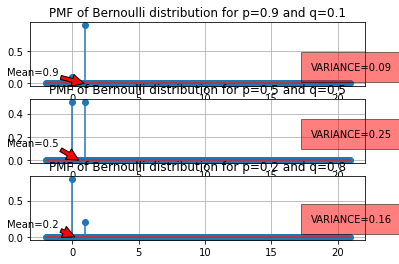

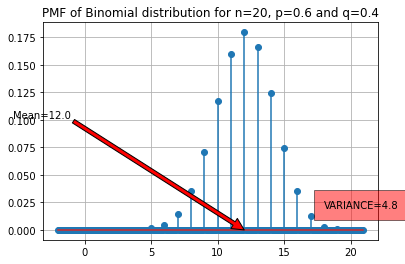

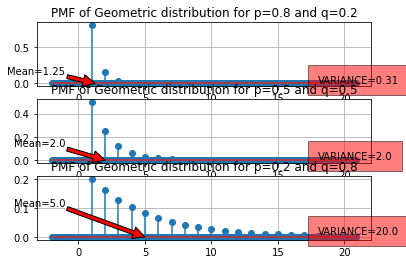

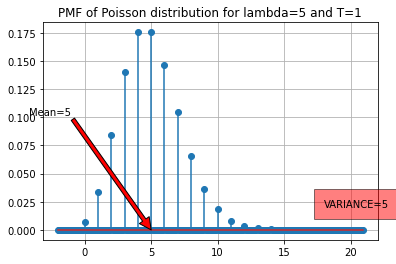

In [2]:
# 1b Discrete distributions

import numpy as np
import matplotlib.pyplot as plt
import math

plt.close('all')

# Function defintion of Ncr
def ncr(n,r):
    f = math.factorial
    return f(n)/(f(n-r)*f(r))

# Function defintion of impulse train
def impulse_train(t):
    temp = np.empty(len(t))
    for i in t:
        if round(float(int(round(i,2))),2)==round(i,2):
            temp[t==i] = 1
        else:
            temp[t==i] = 0
    return temp

# Bernoullis distribution class and its attributes
class bernoulli:
    def __init__(self,p,t):
        self.p = p
        self.q = 1-p
        self.t = t
        self.n = impulse_train(t)
    def pmf(self):
        temp = np.zeros(len(self.t))
        temp[np.round(self.t,2)==0.0] = self.q
        temp[np.round(self.t,2)==1.0] = self.p
        temp[(np.round(self.t,2)!=1.0) & (np.round(self.t,2)!=0.0)] = 0
        temp_imp = impulse_train(self.t)
        temp1 = np.multiply(temp,temp_imp)
        return temp1
    def mean(self):
        return round(self.p,2)
    def variance(self):
        temp = self.p*self.q
        return round(temp,2)
    
    
# Binomial distribution class and its attributes   
class binomial:
    def __init__(self,p,n,t):
        self.p = p
        self.q = 1-p
        self.t = t
        self.n = n
    def pmf(self):
        temp = np.zeros(len(self.t))
        for i in self.t:
            if i>=0 and i<=self.n:
                temp[self.t==i] = (ncr(int(self.n),int(i)))*(self.p**int(i))*(self.q**(self.n-int(i)))
            else:
                temp[self.t==i] = 0
        temp_imp = impulse_train(self.t)
        temp1 = np.multiply(temp,temp_imp)
        return temp1
    def mean(self):
        return round(self.n*self.p,2)
    def variance(self):
        temp = self.n*self.p*self.q
        return round(temp,2)


# Geometric distribution class and its attributes    
class geometric:
    def __init__(self,p,t):
        self.p = p
        self.q = 1-p
        self.t = t
    def pmf(self):
        temp = np.zeros(len(self.t))
        temp[self.t>=1] = np.power(self.q,(self.t[self.t>=1]-1))*self.p
        temp_imp = impulse_train(self.t)
        temp1 = np.multiply(temp,temp_imp)
        return temp1
    def mean(self):
        return round(1/self.p,2)
    def variance(self):
        temp = (1-self.p)/(self.p**2)
        return round(temp,2)

# Poisson distribution class and its attributes
class poisson:
    def __init__(self,lam,T,t):
        self.lam = lam
        self.T = T
        self.t = t
    def pmf(self):
        temp = np.zeros(len(self.t))
        temp_lam = self.lam*self.T
        for i in self.t:
            if i>=0: 
                temp[self.t==i] = (math.exp(0-temp_lam))*(temp_lam**i)/math.factorial(int(i))
            else:
                temp[self.t==i] = 0
        temp_imp = impulse_train(self.t)
        temp1 = np.multiply(temp,temp_imp)
        return temp1
    def mean(self):
        return round(self.lam*self.T,2)
    def variance(self):
        temp = self.lam*self.T
        return round(temp,2)


# Dictionary datatype to store all the given distributions
x = {}

# Range of random variables
t1 = np.arange(-2,21,0.1)

# Bernoulli's distribution
# Parameters
q1 = [0.1,0.5,0.8]
p1 = []
titles1 = []
print('Section-1 in discrete distributions follows Bernoulli distribution with parameter p')

# Evaluating the distribution
for i in range(len(q1)):
    key = 'bernoulli'+str(i+1)
    p1.append(round(1-q1[i],2))
    x[key] = bernoulli(p1[i],t1)
    temp_title = 'PMF of Bernoulli distribution for p='+str(p1[i])+' and q='+str(q1[i])
    titles1.append(temp_title) 

# Plotting the distribution        
fig,ax = plt.subplots(3,1)
for i in range(len(q1)):
    key = 'bernoulli'+str(i+1)
    ax[i].stem(t1,x[key].pmf(),use_line_collection=True)
    ax[i].set_title(titles1[i])
    ax[i].annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-1,0.1),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
    ax[i].text(18,0.2,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    ax[i].grid()       



# Binomial distribution
# Parameters
n2 = 20
q2 = 0.4
p2 = round(1-q2,2)

# Evaluating the distribution
key = 'binomial'
x[key] = binomial(p2,n2,t1)
titles2 = 'PMF of Binomial distribution for n='+str(n2)+', p='+str(p2)+' and q='+str(q2)
print('Section-2 in discrete distributions follows Binomial distribution with parameters n,p')
print('If X1,X2,X3..., Xn represent n identical and independent Bernoulli trials, then the random variable represented by X=X1+X2+...+Xn follows Binomial distribution')
print('Binomial distribution is a generalization of Bernoulli distribution for n no. of trials')

# Plotting the distribution
fig,ax = plt.subplots()
key = 'binomial'
ax.stem(t1,x[key].pmf(),use_line_collection=True)
ax.set_title(titles2)
ax.annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-1,0.1),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
ax.text(18,0.02,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax.grid()


# Geometric distribution and its parameters
p3 = []
q3 = [0.2,0.5,0.8]
titles3 = []
print('Section-3 in discrete distributions follows Geometric distribution with parameter p')
print('The geometric distribution represents the number of trials till we get a success in a series of Bernoulli trials.')

# Evaluating the distribution
for i in range(len(q3)):
    key = 'geometric'+str(i+1)
    p3.append(round(1-q3[i],2))
    x[key] = geometric(p3[i],t1)
    temp_title = 'PMF of Geometric distribution for p='+str(p3[i])+' and q='+str(q3[i])
    titles3.append(temp_title) 

# Plotting the distribution
fig,ax = plt.subplots(3,1)
for i in range(len(q3)):
    key = 'geometric'+str(i+1)
    ax[i].stem(t1,x[key].pmf(),use_line_collection=True)
    ax[i].set_title(titles3[i])
    ax[i].annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-1,0.1),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
    ax[i].text(18,0.01,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    ax[i].grid()  


# Poisson's distribution and its parameters    
lam4 = 5
T4 = 1

# Evaluating the distribution
key = 'poisson'
x[key] = poisson(lam4,T4,t1)
titles4 = 'PMF of Poisson distribution for lambda='+str(lam4)+' and T='+str(T4)
print('Section-4 in discrete distributions follows Poisson distribution with parameters lambda,T')
print('When the no. of trials in a bernoulli experiment (n) becomes very large, then the Binomial distribution gets approximated to a Poisson distribution')

# Plotting the distribution
fig,ax = plt.subplots()
key = 'poisson'
ax.stem(t1,x[key].pmf(),use_line_collection=True)
ax.set_title(titles4)
ax.annotate('Mean='+str(x[key].mean()),(x[key].mean(),0),xytext=(-1,0.1),arrowprops=dict(facecolor='red'),horizontalalignment='right', verticalalignment='bottom')
ax.text(18,0.02,'VARIANCE='+str(x[key].variance()),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax.grid()


At delay=2, the autocorrelation function of  x1  is 2.43
The power of the signal, x1  is 3.34
At delay=2, the autocorrelation function of  x2  is 4.0
The power of the signal, x2  is 5.33
At delay=2, the autocorrelation function of  x3  is 0.77
The power of the signal, x3  is 1.59
At delay=2, the autocorrelation function of  x4  is 4.0
The power of the signal, x4  is 5.33
At delay=2, the autocorrelation function of  x5  is 0.38
The power of the signal, x5  is 0.53
At delay=2, the autocorrelation function of  x6  is 3.72
The power of the signal, x6  is 4.83
Execution times of auto-correlation function for all the sequences:
Using user-defined functions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0009996891021728516]
Using numpy function: [0.0, 0.0010018348693847656, 0.0, 0.0, 0.0, 0.0]
So, Library functions are faster than user-defined method
At delay=2, the cross-correlation function of  x1  and  x2  is 2.01
At delay=2, the cross-correlation function of  x1  and  x3  is 1.48
At delay=2, the cross-corr

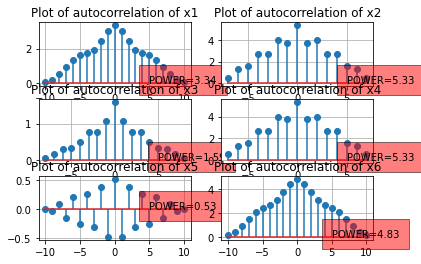

In [3]:
# 2 Correlation


import numpy as np
import matplotlib.pyplot as plt
import time

plt.close('all')


# Function definitions of mean and standard deviation

def mean(seq):
    temp = round(np.sum(seq)/len(seq),2)
    return temp

def st_dev(seq):
    mu = mean(seq)
    var = np.sum(np.square(seq-mu))/len(seq)
    sig = round(np.sqrt(var),2)
    return sig


# Function definition of correlation between 2 sequences

def correlation(seq1,seq2,delay):
    left_lim = 0-(len(seq1)-1)
    right_lim = len(seq2)-1
    out_range = np.arange(left_lim,right_lim+1)
    out_length = len(seq1) + len(seq2) - 1
    sig_1 = st_dev(seq1)
    sig_2 = st_dev(seq2)
    out_seq = np.zeros(out_length)
    p = -1
    for i in out_range:
        p += 1
        for j in range(len(seq1)):
            for k in range(len(seq2)):
                if k-j==i:
                    out_seq[p] += (seq1[j]*seq2[k])
                else:
                    continue
    out_seq = out_seq/(sig_1*sig_2*out_length)
    out_obj = [out_range,out_seq]
    return out_obj


tau = 2
x = []
AC_labels = []
AC_titles = []

# Appending all the sequences to a list x
for i in range(6):
    if i+1==1:
        temp = np.array([1,2,3,2,1,2,3,4,3,2,1])
    elif i+1==2:
        temp = np.array([1,2,1,2,1,2,1,2])
    elif i+1==3:
        temp = np.array([1,2,3,2,4,6,4,8,12])
    elif i+1==4:
        temp = np.array([2,4,2,4,2,4,2,4])
    elif i+1==5:
        temp = np.array([1,-2,3,-2,1,-2,3,-4,3,-2,1])
    elif i+1==6:
        temp = (x[0]*2)+1
    AC_labels.append('x'+str(i+1))
    AC_titles.append('Plot of autocorrelation of '+str(AC_labels[i]))
    x.append(temp)


# List to store time range of autocorrelation sequences for the given signals
AC_x = []

# Lists to store autocorrelation values at tau=2 using user-defined functions
AC_m_tau = []

# List to store the Power of given signals    
AC_m_pow = []    

# List to store autocorrelation sequences of all the given signals using user-defined functions    
AC_m_y = []

# Execution time of user-defined auto-correlation function
AC_ex_time_m = []


# Lists to store the autocorrelation sequences of all the given signals using numpy functions
AC_a_y = []

# Execution time of numpy auto-correlation function
AC_ex_time_a = []


# Evaluating the autocorrelation sequences, power and execution time of the given signals using user-defined function
for i in range(len(x)):
    start_time = time.time()
    temp_obj = correlation(x[i],x[i],tau)
    end_time = time.time()
    AC_ex_time_m.append(end_time-start_time)
    AC_x.append(temp_obj[0])
    AC_m_y.append(temp_obj[1])
    temp_x = AC_x[i]
    temp_y = AC_m_y[i]
    AC_m_tau.append(np.around(temp_y[temp_x==tau],2)[0])
    print('At delay=2, the autocorrelation function of ',AC_labels[i],' is', AC_m_tau[i])
    AC_m_pow.append(np.around(temp_y[temp_x==0],2))
    print('The power of the signal,',AC_labels[i],' is', AC_m_pow[i][0])


# Evaluating the autocorrelation sequences and execution time of the given signals using numpy function   
    temp_sig1 = np.sqrt(np.var(x[i]))
    temp_sig2 = np.sqrt(np.var(x[i]))
    start_time = time.time()
    temp_corr = np.correlate(x[i],x[i],mode='full')/(temp_sig1*temp_sig2*len(AC_x[i]))
    end_time = time.time()
    AC_ex_time_a.append(end_time-start_time)
    AC_a_y.append(temp_corr)
    
    
print('Execution times of auto-correlation function for all the sequences:')
print('Using user-defined functions:',AC_ex_time_m)
print('Using numpy function:',AC_ex_time_a)
print('So, Library functions are faster than user-defined method')


# Plotting the auto correlation sequences of the given input signals
fig,ax = plt.subplots(3,2)
p = 0
for i in range(len(x)//2):
    for j in range(2):
        ax[i,j].stem(AC_x[p],AC_m_y[p],use_line_collection=True)
        ax[i,j].set_title(AC_titles[p])
        ax[i,j].text(5,0.001,'POWER='+str(AC_m_pow[p][0]),bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
        ax[i,j].grid()
        p+=1





    

CC_a_y = []

# Lists to store autocorrelation values at tau=2 using user-defined functions
CC_m_tau = []

# List to store time range of crosscorrelation sequences for the given signals
CC_x = []

# List to store crosscorrelation sequences of all the given signals using user-defined functions 
CC_m_y = []
CC_labels = []

# Execution time of user-defined cross-correlation function
CC_ex_time_m = []

# Execution time of numpy auto-correlation function
CC_ex_time_a = []
 

# Evaluating the crosscorrelation sequences and execution time of the given signals using user-defined function
p = 0  
for i in range(len(x)):
    for j in range(i+1,len(x)):
        start_time = time.time()
        temp_obj = correlation(x[i],x[j],tau)
        end_time = time.time()
        CC_ex_time_m.append(end_time-start_time)
        CC_x.append(temp_obj[0])
        CC_m_y.append(temp_obj[1])
        temp_x = CC_x[p]
        temp_y = CC_m_y[p]
        CC_m_tau.append(np.around(temp_y[temp_x==tau],2)[0])
        print('At delay=2, the cross-correlation function of ',AC_labels[i],' and ',AC_labels[j],' is', CC_m_tau[p])

# Evaluating the crosscorrelation sequences and execution time of the given signals using numpy function         
        temp_sig1 = np.sqrt(np.var(x[j]))
        temp_sig2 = np.sqrt(np.var(x[i]))
        start_time = time.time()
        temp_corr = np.correlate(x[j],x[i],mode='full')/(temp_sig1*temp_sig2*len(CC_x[p]))
        end_time = time.time()
        CC_ex_time_a.append(end_time-start_time)
        CC_a_y.append(temp_corr)
        p += 1
        
print('Execution times of cross-correlation function for all the sequences:')
print('Using user-defined functions:',CC_ex_time_m)
print('Using numpy function:',CC_ex_time_a)
print('So, Library functions are faster than user-defined method')
        

        
        


1a. Uncorrelated uniform noise is called so because the noise samples are uncorrelated wrt each other and follow uniform distribution
1b. Uncorrelated uniform noise follows uniform distribution
2a. Uncorrelated white noise is called so because the noise samples are uncorrelated wrt each other and has a flat spectral density analogous to white light
2b. Uncorrelated white Gaussian noise follows Gaussian distribution with zero mean and constant variance
3a. Red noise is called so because the noise samples are generated with temporal integration of white noise and has a spectral density which inversely varies with square of frequency. That means spectral density is more concentrated at low frequencies which is analogous to red light
3b. Red Gaussian noise follows Gaussian distribution with zero mean and constant variance


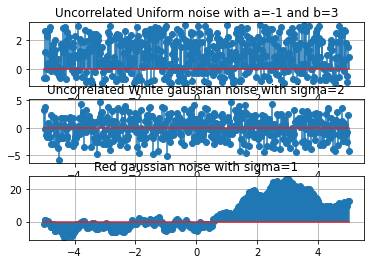

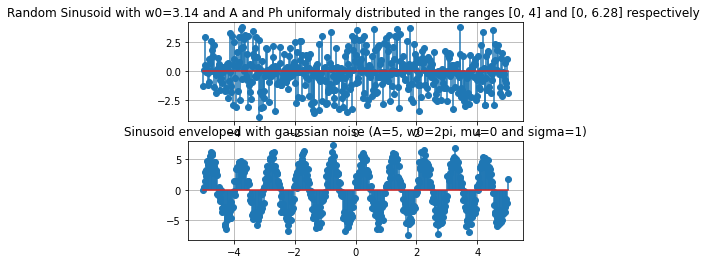

In [4]:
# 3a Different types of noisy signals

import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

# List of random signals
signals = ['uniform_noise','white_noise','red_noise','rand_sinusoid','noisy_sinusoid']
titles = []


# Function defintions of the random signals
def uniform_noise(a,b,n):
    temp = np.random.uniform(a,b,n)
    return temp

def white_noise(sig,n):
    temp = np.random.normal(0,sig,n)
    return temp

def red_noise(sig,n):
    temp = np.random.normal(0,sig,n)
    temp1 = np.cumsum(temp)
    return temp1

def rand_sinusoid(A,w,ph,n,t):
    temp_A = np.random.uniform(A[0],A[1],n)
    temp_ph = np.random.uniform(ph[0],ph[1],n)
    temp_cos = np.cos(w*t+temp_ph)
    temp = np.multiply(temp_A,temp_cos)
    return temp
    
def noisy_sinusoid(A,w,mu,sig,n,t):
    temp_sin = A*np.sin(w*t)
    temp_noise = np.random.normal(mu,sig,n)
    temp = temp_sin + temp_noise
    return temp


print('1a. Uncorrelated uniform noise is called so because the noise samples are uncorrelated wrt each other and follow uniform distribution')
print('1b. Uncorrelated uniform noise follows uniform distribution')
print('2a. Uncorrelated white noise is called so because the noise samples are uncorrelated wrt each other and has a flat spectral density analogous to white light')
print('2b. Uncorrelated white Gaussian noise follows Gaussian distribution with zero mean and constant variance')
print('3a. Red noise is called so because the noise samples are generated with temporal integration of white noise and has a spectral density which inversely varies with square of frequency. That means spectral density is more concentrated at low frequencies which is analogous to red light')
print('3b. Red Gaussian noise follows Gaussian distribution with zero mean and constant variance')
    


n1 = 500

# Range of values of time
t1 = np.linspace(-5,5,n1)

# Parameters of uniform noise
a1 = -1
b1 = 3

# Parameters of white noise
sig2 = 2

# Parameters of red noise
sig3 = 1

# Parameters of random sinusoid
A4 = [0,4]
w4 = np.round(np.pi,2)
ph4 = [0,np.round(2*np.pi,2)]

# Parameters of noisy sinusoid
A5 = 5
w5 = np.round(2*np.pi,2)
mu5 = 0
sig5 = 1

# Dictionary datatype to store all the noisy signals
x = {}

# Generation of noisy signals
for i in range(len(signals)):
    key = signals[i]
    if i+1==1:
        x[key] = uniform_noise(a1,b1,n1)
        temp_title = 'Uncorrelated Uniform noise with a='+str(a1)+' and b='+str(b1)
    elif i+1==2:
        x[key] = white_noise(sig2,n1)
        temp_title = 'Uncorrelated White gaussian noise with sigma='+str(sig2)
    elif i+1==3:
        x[key] = red_noise(sig3,n1)
        temp_title = 'Red gaussian noise with sigma='+str(sig3)
    elif i+1==4:
        x[key] = rand_sinusoid(A4,w4,ph4,n1,t1)
        temp_title = 'Random Sinusoid with w0='+str(w4)+' and A and Ph uniformaly distributed in the ranges '+str(A4)+' and '+str(ph4)+' respectively '
    elif i+1==5:
        x[key] = noisy_sinusoid(A5,w5,mu5,sig5,n1,t1)
        temp_title = 'Sinusoid enveloped with gaussian noise (A=5, w0=2pi, mu=0 and sigma=1)'
    titles.append(temp_title)


# Plotting the noisy signals
fig,ax = plt.subplots(3,1)        
for i in range(3):
    key = signals[i]
    ax[i].stem(t1,x[key],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].grid()
    
fig,ax = plt.subplots(2,1)        
for i in range(len(signals)-3):
    j = i+3
    key = signals[j]
    ax[i].stem(t1,x[key],use_line_collection=True)
    ax[i].set_title(titles[j])
    ax[i].grid()
    
    
   





Non-linear filters like median filter can be used to remove Salt n Pepper noise
Wiener filter or mean filters can be used to remove Gaussian noise
Wiener filter can be used to remove Speckle noise


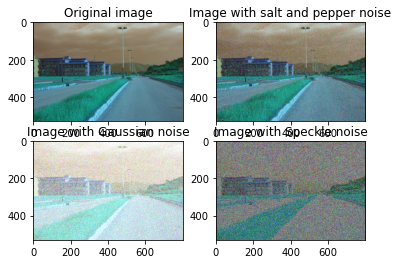

In [5]:
# 3b Generating noisy images (ungraded part)


import cv2
import numpy as np
import matplotlib.pyplot as plt



# Function defintion to add Salt and Pepper noise to the image

def s_p(input_im,t1,t2):
    noise = np.random.uniform(0,1,input_im.shape)
    noisy_im = np.zeros(input_im.shape,dtype='uint8')
    noisy_im[noise>t2] = 255
    noisy_im[noise<t1] = 0
    noisy_im[(noise>t1) & (noise<t2)] = input_im[(noise>t1) & (noise<t2)]
    return noisy_im

# Function defintion to add Gaussian noise to the image

def gaussian(input_im,mu,sig):
    noise = np.random.normal(mu,sig,input_im.shape)
    noise = noise*255
    noise = noise.astype('uint8')
    noisy_im = cv2.add(input_im,noise)
    return noisy_im

# Function defintion to add Speckle noise to the image

def speckle(input_im,mu,sig):
    noise = np.random.normal(mu,sig,input_im.shape)
    noisy_im = (input_im + input_im*noise).astype('uint8')
    return noisy_im
    
                
# Reading original image 
orig_im = cv2.imread("C:\D_drive\IITG\Sem-2\DSP Lab\Assignments\Assignment-2\IITG.jpg")


# Calling functions to add different noises
sp_im = s_p(orig_im,0.01,0.95)
gs_im = gaussian(orig_im,0,1)
speckle_im = speckle(orig_im,0,1)

# Displaying the original and noisy images

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(orig_im)
ax[0,0].set_title('Original image')
ax[0,1].imshow(sp_im)
ax[0,1].set_title('Image with salt and pepper noise')
ax[1,0].imshow(gs_im)
ax[1,0].set_title('Image with Gaussian noise')
ax[1,1].imshow(speckle_im)
ax[1,1].set_title('Image with Speckle noise')



print('Non-linear filters like median filter can be used to remove Salt n Pepper noise')
print('Wiener filter or mean filters can be used to remove Gaussian noise')
print('Wiener filter can be used to remove Speckle noise')
        
